In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import swat
from time import time
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler

# Importing preprocessed train
import sys
sys.path.append("..")
from Functions.UNSW_DF import *

train, test = DF_original_traintest()

Reading Original CSV Files..
	 Train Shape:  	 (175341, 45)
	 Test Shape:  	 (82332, 45)
Dataset Loaded!


In [5]:
# Defining an empty list
categorical = []
# Iterating through the columns and checking for columns with datatyp "Object"
for col in train.columns:
    if train[col].dtype == 'object':
        categorical.append(col) # appending "object" columns to categorical
        
non_categorical_columns = [x for x in train.columns if x not in categorical]

In [6]:
# Label encoding the categorical columns
le = preprocessing.LabelEncoder()
# Label encoding the columns for the test and training set
test[categorical] = test[categorical].apply(le.fit_transform)
train[categorical] = train[categorical].apply(le.fit_transform)

# Applying StandardScaler on train to normalize the values.
ss = StandardScaler()
train = pd.DataFrame(ss.fit_transform(train),columns = train.columns)

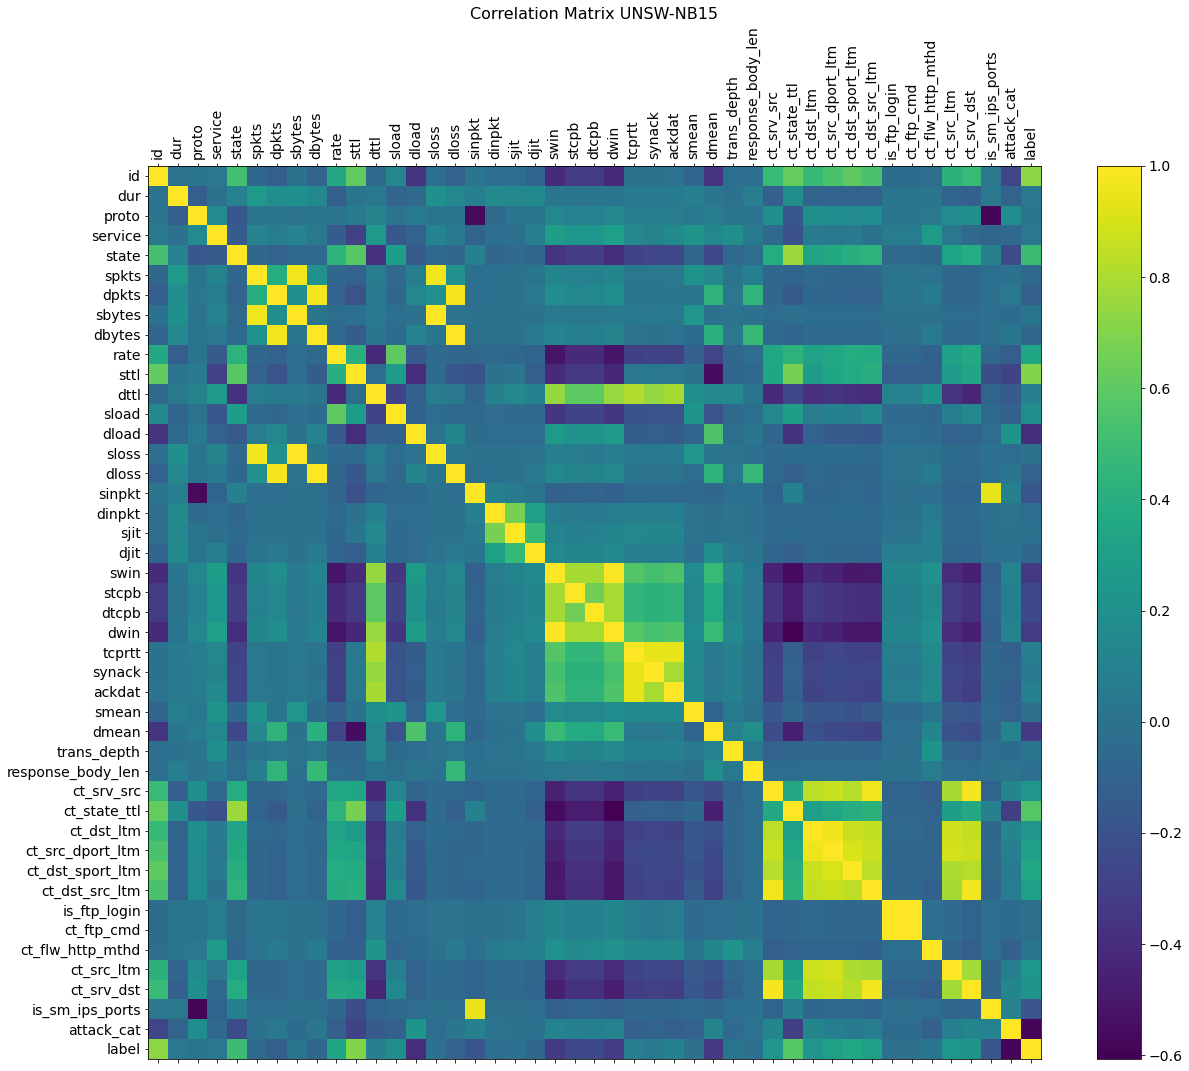

In [28]:
f = plt.figure(figsize=(20, 16))
plt.matshow(train.corr(), fignum=f.number)

plt.xticks(range(train.select_dtypes(['number']).shape[1]), 
            train.select_dtypes(['number']).columns, 
            fontsize=14, 
            rotation=90)

plt.yticks(range(train.select_dtypes(['number']).shape[1]), 
            train.select_dtypes(['number']).columns, 
            fontsize=14)

cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix UNSW-NB15', fontsize=16)

plt.savefig('Dataset Correlation (4).png', dpi=300, bbox_inches='tight')